# Import

In [2]:
%matplotlib inline
import os
import glob

import numpy as np
from astropy.io.ascii import write
from astropy.table import Table, Column
from matplotlib import pyplot as plt


# LRIS targets

## Read in file of LRIS targets and edit

In [3]:
observed = Table.read('/Users/thsyu/Dropbox/BCDs/science_frames/lris_reduction.csv', format='ascii', delimiter=',', data_start=1)
observed.rename_column('col1', 'Target')
observed.rename_column('col2', 'Exposure')
observed.rename_column('col3', 'GratingGrism')
observed.rename_column('col4', 'Exten')
observed.rename_column('col5', 'Redshift')
observed.rename_column('col6', 'File Name')

In [4]:
observed[0:5]

Target,Exposure,GratingGrism,Exten,Redshift,File Name
str15,int64,str8,int64,float64,str49
OFF_KJ2,300,600/4000,1,0.01432,spec1d_OFF_KJ2_LRISb_2016Feb16T140313.fits
OFF_KJ2,300,600/4000,1,0.01416,spec1d_OFF_KJ2_LRISb_2016Feb16T140850.fits
OFF_KJ2,300,600/4000,1,0.01423,spec1d_OFF_KJ2_LRISb_2016Feb16T141427.fits
OFF_KJ2,300,600/4000,1,0.01429,spec1d_OFF_KJ2_LRISb_2016Feb16T142004.fits
OFF_KJ2,300,600/4000,1,0.0142,spec1d_OFF_KJ2_LRISb_2016Feb16T142541.fits


In [5]:
all_targets = []

for i in range(len(observed)-1):
    if observed[i]['Target'] != observed[i+1]['Target']:
        all_targets.append(observed[i]['Target'])
all_targets.append('OFF_J2319p1616')

all_targets.remove('OFF_J0321m1439')
all_targets.remove('OF_J1121p3744A')
all_targets.remove('OF_J1121p3744B')
all_targets.remove('OFF_J0000p3053')
all_targets.remove('OFF_J1044p6306')

print (len(all_targets))

28


In [6]:
for obj in range(len(all_targets)):
    
    print (all_targets[obj].strip('OFF_').strip('OF_'))

KJ2
KJ5
KJ29
KJ5B
KJ97
J0201p0919
J0220p2044A
J0220p2044B
J0452m0541
J1655p6337
J1705p3527
J1732p4452
J2230m0531
J2339p3230
J0000p3052A
J0000p3052B
J0118p3512
J0140p2951
J0743p4807
J0812p4836
J0834p5905
J0943p3326
J1414m0208
J1425p4441
J1757p6454
J2030m1343
J2213p1722
J2319p1616


## Build Table for MCMC input for each target

In [35]:
# Loop through targets
for obj in range(2,3):#len(all_targets)):
    # Red side
    Ha_cont = []
    Ha_emis = []
    He7067_cont = []
    He7067_emis = []
    He6680_cont = []
    He6680_emis = []
    He5877_cont = []
    He5877_emis = []
    # Blue side
    Hb_cont = []
    Hb_emis = []
    Hg_cont = []
    Hg_emis = []
    Hd_cont = []
    Hd_emis = []
    H8_He3890_cont = []
    H8_He3890_emis = []
    He5017_cont = [] = []
    He5017_emis = []
    He4472_cont = []
    He4472_emis = []
    He4027_cont = []
    He4027_emis = []
    
    os.chdir('/Users/thsyu/Dropbox/BCDs/science_frames/' + all_targets[obj])
    print ('Working on', all_targets[obj].strip('OFF_').strip('OF_'))
#    os.chdir('/Users/thsyu/Dropbox/BCDs/papers/lc/newflux/')
#    print ('Working on the Little Cub')

    # Find the LRISb+LRISr .mod.out files and open them
    models = glob.glob('*LRIS*.mod.out')
    print ('Model files:', models)
    
    for k in range(len(models)):
        if 'LRISb' in models[k]:
            for line in open(models[k], 'r'):
                # Pull lines in the .mod.out file associated to each wavelength of interest
                # This will only find the emission line flux measurement + error
                # Also find the specid corresponding to this wavelength so that we can find continuum levels
                if 'wave=4862.721' in line:
                    Hb_emis.append(line)
                    Hb_spec_idx = line.find('specid=')
                    Hb_spec_id = 'specid=' + str(int(line[Hb_spec_idx+7:Hb_spec_idx+9]))
                elif 'wave=4341.684' in line:
                    Hg_emis.append(line)
                    Hg_spec_idx = line.find('specid=')
                    Hg_spec_id = 'specid=' + str(int(line[Hg_spec_idx+7:Hg_spec_idx+9]))
                elif 'wave=4102.891' in line:
                    Hd_emis.append(line)
                    Hd_spec_idx = line.find('specid=')
                    Hd_spec_id = 'specid=' + str(int(line[Hd_spec_idx+7:Hd_spec_idx+9]))
                elif 'wave=3890.151' in line:
                    H8_He3890_emis.append(line)
                    H8_He3890_spec_idx = line.find('specid=')
                    H8_He3890_spec_id = 'specid=' + str(int(line[H8_He3890_spec_idx+7:H8_He3890_spec_idx+9]))
                elif 'wave=5017.079' in line:
                    He5017_emis.append(line)
                    He5017_spec_idx = line.find('specid=')
                    He5017_spec_id = 'specid=' + str(int(line[He5017_spec_idx+7:He5017_spec_idx+9]))
                elif 'wave=4472.755' in line:
                    He4472_emis.append(line)
                    He4472_spec_idx = line.find('specid=')
                    He4472_spec_id = 'specid=' + str(int(line[He4472_spec_idx+7:He4472_spec_idx+9]))
                elif 'wave=4027.328' in line:
                    He4027_emis.append(line)
                    He4027_spec_idx = line.find('specid=')
                    He4027_spec_id = 'specid=' + str(int(line[He4027_spec_idx+7:He4027_spec_idx+9]))
        elif 'LRISr' in models[k]:
            for line in open(models[k], 'r'):
                if 'wave=6564.612' in line:
                    Ha_emis.append(line)
                    Ha_spec_idx = line.find('specid=')
                    Ha_spec_id = 'specid=' + str(int(line[Ha_spec_idx+7:Ha_spec_idx+9]))
                elif 'wave=7067.198' in line:
                    He7067_emis.append(line)
                    He7067_spec_idx = line.find('specid=')
                    He7067_spec_id = 'specid=' + str(int(line[He7067_spec_idx+7:He7067_spec_idx+9]))
                elif 'wave=6679.994' in line:
                    He6680_emis.append(line)
                    He6680_spec_idx = line.find('specid=')
                    He6680_spec_id = 'specid=' + str(int(line[He6680_spec_idx+7:He6680_spec_idx+9]))
                elif 'wave=5877.299' in line:
                    He5877_emis.append(line)
                    He5877_spec_idx = line.find('specid=')
                    He5877_spec_id = 'specid=' + str(int(line[He5877_spec_idx+7:He5877_spec_idx+9]))   
    for j in range(len(models)):
        if 'LRISb' in models[j]:
            for line in open(models[j], 'r'):
                # This now searches the .mod.out file for the continuum level
                if 'legendre' in line and Hb_spec_id in line:
                    Hb_cont.append(line)
                elif 'legendre' in line and Hg_spec_id+' ' in line:
                    Hg_cont.append(line)
                elif 'legendre' in line and Hd_spec_id in line:
                    Hd_cont.append(line)
                elif 'legendre' in line and H8_He3890_spec_id in line:
                    H8_He3890_cont.append(line)
                elif 'legendre' in line and He5017_spec_id in line:
                    He5017_cont.append(line)
                elif 'legendre' in line and He4472_spec_id in line:
                    He4472_cont.append(line)
                elif 'legendre' in line and He4027_spec_id in line:
                    He4027_cont.append(line)
        elif 'LRISr' in models[j]:
            for line in open(models[j], 'r'):
                if 'legendre' in line and Ha_spec_id in line:
                    Ha_cont.append(line)
                elif 'legendre' in line and He7067_spec_id in line:
                    He7067_cont.append(line)
                elif 'legendre' in line and He6680_spec_id in line:
                    He6680_cont.append(line)
                elif 'legendre' in line and He5877_spec_id in line:
                    He5877_cont.append(line)
                    
    # Now fill a table with the continuum level + error, flux + error for each line
    targ_table = Table()
    targ_table['Wavelength'] = Column([3890.166, 4027.328, 4102.891, 4341.684, 4472.755, 4862.721, 5017.079, 5877.299, 6564.612, 6679.994, 7067.198])
    targ_table['Species'] = Column(['hydrogen+helium', 'helium', 'hydrogen', 'hydrogen', 'helium', 'hydrogen', 'helium', 'helium', 'hydrogen', 'helium', 'helium'])
    
    Hb_flux = float(Hb_emis[0].split()[1])
    Hb_continuum = float(Hb_cont[0].split()[1])
    Hb_cont_err = float(Hb_cont[1].split()[2])
    
    targ_table['Flux Ratio'] = Column([float(H8_He3890_emis[0].split()[1])/Hb_flux, float(He4027_emis[0].split()[1])/Hb_flux, \
                                       float(Hd_emis[0].split()[1])/Hb_flux, float(Hg_emis[0].split()[1])/Hb_flux, \
                                       float(He4472_emis[0].split()[1])/Hb_flux, float(Hb_emis[0].split()[1])/Hb_flux, \
                                       float(He5017_emis[0].split()[1])/Hb_flux, float(He5877_emis[0].split()[1])/Hb_flux, \
                                       float(Ha_emis[0].split()[1])/Hb_flux, float(He6680_emis[0].split()[1])/Hb_flux, \
                                       float(He7067_emis[0].split()[1])/Hb_flux])
    targ_table['Flux Ratio Errors'] = Column([float(H8_He3890_emis[1].split()[2])/Hb_flux, float(He4027_emis[1].split()[2])/Hb_flux, \
                                       float(Hd_emis[1].split()[2])/Hb_flux, float(Hg_emis[1].split()[2])/Hb_flux, \
                                       float(He4472_emis[1].split()[2])/Hb_flux, float(Hb_emis[1].split()[2])/Hb_flux, \
                                       float(He5017_emis[1].split()[2])/Hb_flux, float(He5877_emis[1].split()[2])/Hb_flux, \
                                       float(Ha_emis[1].split()[2])/Hb_flux, float(He6680_emis[1].split()[2])/Hb_flux, \
                                       float(He7067_emis[1].split()[2])/Hb_flux])
    
    print(targ_table)
    # EW = F_line / F_continuum; 
    targ_table['EW'] = Column([float(H8_He3890_emis[0].split()[1])/float(H8_He3890_cont[0].split()[1]), float(He4027_emis[0].split()[1])/float(He4027_cont[0].split()[1]), \
                              float(Hd_emis[0].split()[1])/float(Hd_cont[0].split()[1]), float(Hg_emis[0].split()[1])/float(Hg_cont[0].split()[1]), \
                              float(He4472_emis[0].split()[1])/float(He4472_cont[0].split()[1]), float(Hb_emis[0].split()[1])/float(Hb_cont[0].split()[1]), \
                              float(He5017_emis[0].split()[1])/float(He5017_cont[0].split()[1]), float(He5877_emis[0].split()[1])/float(He5877_cont[0].split()[1]), \
                              float(Ha_emis[0].split()[1])/float(Ha_cont[0].split()[1]), float(He6680_emis[0].split()[1])/float(He6680_cont[0].split()[1]), \
                              float(He7067_emis[0].split()[1])/float(He7067_cont[0].split()[1])])
    targ_table['EW Errors'] = Column([float(H8_He3890_emis[0].split()[1])/float(H8_He3890_cont[0].split()[1]) * np.sqrt( (float(H8_He3890_emis[1].split()[2])/float(H8_He3890_emis[0].split()[1]))**2. + (float(H8_He3890_cont[1].split()[2])/float(H8_He3890_cont[0].split()[1]))**2. ), \
                                      float(He4027_emis[0].split()[1])/float(He4027_cont[0].split()[1]) * np.sqrt( (float(He4027_emis[1].split()[2])/float(He4027_emis[0].split()[1]))**2. + (float(He4027_cont[1].split()[2])/float(He4027_cont[0].split()[1]))**2. ), \
                                      float(Hd_emis[0].split()[1])/float(Hd_cont[0].split()[1]) * np.sqrt( (float(Hd_emis[1].split()[2])/float(Hd_emis[0].split()[1]))**2. + (float(Hd_cont[1].split()[2])/float(Hd_cont[0].split()[1]))**2. ), \
                                      float(Hg_emis[0].split()[1])/float(Hg_cont[0].split()[1]) * np.sqrt( (float(Hg_emis[1].split()[2])/float(Hg_emis[0].split()[1]))**2. + (float(Hg_cont[1].split()[2])/float(Hg_cont[0].split()[1]))**2. ), \
                                      float(He4472_emis[0].split()[1])/float(He4472_cont[0].split()[1]) * np.sqrt( (float(He4472_emis[1].split()[2])/float(He4472_emis[0].split()[1]))**2. + (float(He4472_cont[1].split()[2])/float(He4472_cont[0].split()[1]))**2. ), \
                                      float(Hb_emis[0].split()[1])/float(Hb_cont[0].split()[1]) * np.sqrt( (float(Hb_emis[1].split()[2])/float(Hb_emis[0].split()[1]))**2. + (float(Hb_cont[1].split()[2])/float(Hb_cont[0].split()[1]))**2. ), \
                                      float(He5017_emis[0].split()[1])/float(He5017_cont[0].split()[1]) * np.sqrt( (float(He5017_emis[1].split()[2])/float(He5017_emis[0].split()[1]))**2. + (float(He5017_cont[1].split()[2])/float(He5017_cont[0].split()[1]))**2. ), \
                                      float(He5877_emis[0].split()[1])/float(He5877_cont[0].split()[1]) * np.sqrt( (float(He5877_emis[1].split()[2])/float(He5877_emis[0].split()[1]))**2. + (float(He5877_cont[1].split()[2])/float(He5877_cont[0].split()[1]))**2. ), \
                                      float(Ha_emis[0].split()[1])/float(Ha_cont[0].split()[1]) * np.sqrt( (float(Ha_emis[1].split()[2])/float(Ha_emis[0].split()[1]))**2. + (float(Ha_cont[1].split()[2])/float(Ha_cont[0].split()[1]))**2. ), \
                                      float(He6680_emis[0].split()[1])/float(He6680_cont[0].split()[1]) * np.sqrt( (float(He6680_emis[1].split()[2])/float(He6680_emis[0].split()[1]))**2. + (float(He6680_cont[1].split()[2])/float(He6680_cont[0].split()[1]))**2. ), \
                                      float(He7067_emis[0].split()[1])/float(He7067_cont[0].split()[1]) * np.sqrt( (float(He7067_emis[1].split()[2])/float(He7067_emis[0].split()[1]))**2. + (float(He7067_cont[1].split()[2])/float(He7067_cont[0].split()[1]))**2. )])

    targ_table.write('/Users/thsyu/Dropbox/BCDs/primordial_helium/lris_optical_mcmc/'+all_targets[obj].strip('OFF_').strip('OF_'), format='ascii', overwrite=True)
#    targ_table.write('/Users/thsyu/Dropbox/BCDs/primordial_helium/lris_optical_mcmc/LC', format='ascii', overwrite=True)



Working on KJ29
Model files: ['spec1d_OFF_KJ29_LRISb_coadd.mod.out', 'spec1d_OFF_KJ29_LRISr_coadd.mod.out']
Wavelength     Species          Flux Ratio        Flux Ratio Errors  
---------- --------------- -------------------- ---------------------
  3890.166 hydrogen+helium  0.13403648583474959 0.0033414179310808974
  4027.328          helium 0.012464876319710615 0.0027725224348813375
  4102.891        hydrogen  0.19904069934345797 0.0024814756014776016
  4341.684        hydrogen   0.4158584979769493 0.0026370805706177076
  4472.755          helium 0.023428610572324145 0.0020437856736437695
  4862.721        hydrogen                  1.0 0.0036145087761831163
  5017.079          helium  0.01912459164943586 0.0022022593688909896
  5877.299          helium                  0.0                   0.0
  6564.612        hydrogen    2.986538258011854   0.02040829768970089
  6679.994          helium 0.029112444717507412    0.0151822588678489
  7067.198          helium  0.03446461201823549  0.0

ZeroDivisionError: float division by zero

In [102]:
targ_table

Wavelength,Species,Flux Ratio,Flux Ratio Error,EW,EW Errors
float64,str15,float64,float64,float64,float64
3890.166,hydrogen+helium,0.15275710249300448,0.0017611481661372365,15.594927828914603,0.2794570574789472
4027.328,helium,0.0009617381076199545,0.001243966733954682,0.11050974812018638,0.14294756285029486
4102.891,hydrogen,0.22418254613009847,0.001597632132957763,26.19810952561418,0.3980019472418578
4341.684,hydrogen,0.4362155674767093,0.001893562180232723,57.09661849712571,0.7428005750646092
4472.755,helium,0.035316564741617366,0.0009838833474922139,5.4180170773266845,0.16737079769195523
4862.721,hydrogen,1.0,0.002539537932688387,156.9118536970829,2.038931682484717
5017.079,helium,0.019264210848338476,0.0009743709415970532,2.4937565086060567,0.12943383994770596
5877.299,helium,0.09740640882622552,0.006810117997690034,20.034662799066165,2.30035673935456
6564.612,hydrogen,3.291243283417735,0.01807285495575664,751.6063227328248,43.55393847320877


### Check on H-beta

In [82]:
Hb_emis

['  gaussian   145.31339550      0.01412900      30.00000000dh        specid=0  IntFlux=True    wave=4862.721\n',
 '# gaussian   0.36902888      0.00000055      0.00000000dh        specid=0  IntFlux=True    wave=4862.721\n',
 '#       gaussian 120.618346859   0.014508   30.0dh   wave=4862.721    specid=0    IntFlux=True\n']

In [78]:
Hb_cont

['  legendre   0.92608297      -0.05696073        scale=1.0,1.0  specid=0  continuum=True\n',
 '# legendre   0.01180158      0.03905002        scale=1.0,1.0  specid=0  continuum=True\n',
 '#       legendre 0.8951   0.01    scale=[1.0,1.0]   specid=0    continuum=True\n']

In [105]:
# Check that this line calculates the equivalent width correctly
print (float(Hb_emis[0].split()[1])/float(Hb_cont[0].split()[1]))
print (145.31339550/0.92608297 )

156.9118536970829
156.9118536970829


# Make def load_ours() for galaxy.py

In [14]:
everything_table = Table.read('/Users/thsyu/Dropbox/BCDs/papers/kast_survey/everything_table', format='ascii', delimiter=' ')

In [32]:
everything_table[0:5]

Target Name,RA,DEC,Observations,Redshift,Redshift error,u,u error,g,g error,r,r error,i,i error,z,z error,H_alpha,H_alpha error,[NII]6550,[NII]6550 error,[NII]6585,[NII]6585 error,[SII]6718,[SII]6718 error,[SII]6733,[SII]6733 error,HeI 5876,HeI 5876 error,HeI 6678,HeI 6678 error,HeI 7065,HeI 7065 error,HeI 7283,HeI 7283 error,H_beta,H_beta error,[OIII]4960,[OIII]4960 error,[OIII]5008,[OIII]5008 error,[OIII]4363,[OIII]4363 error,[OII]3727,[OII]3727 error,[OII]3729,[OII]3729 error,H_gamma,H_gamma error,H_delta,H_delta error,H_epsilon,H_epsilon error,H8,H8 error,H9,H9 error,H10,H10 error,H11,H11 error,H12,H12 error,NeIII,NeIII error,HeI 4026,HeI 4026 error,HeI 4471,HeI 4471 error,HeI 4922,HeI 4922 error,HeI 5017,HeI 5017 error,H_alpha_cont,H_alpha_cont_err,H_beta_cont,H_beta_cont_err,H_gamma_cont,H_gamma_cont_err,H_delta_cont,H_delta_cont_err,H_eps_cont,H_eps_cont_err,H8_cont,H8_cont_err,H9_cont,H9_cont_err,H10_cont,H10_cont_err,H11_cont,H11_cont_err,H12_cont,H12_cont_err,c(Hb),a(HI),EW(Hb),EW(Hb)_err,t3,t3_error,t2,t2_error,o3,o3_error,o2,o2_error,12+log(O/H),12+log(O/H)_error,luminosity distance,Ha luminosity,SFR,Mould Distance,Mould Distance error,M_B Mould,M_B Lum,Berg Z Mould,Berg error Mould,Berg Z Lum,Berg error Lum,Ha luminosity error factor,SFR error
str13,str11,str12,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1425p4441,14:25:15.83,+44:41:47.5,Shane+Kast,0.00753836,3.19e-06,18.93,0.26,18.42,0.06,18.46,0.08,18.87,0.08,18.78,0.55,738.7861697645001,13.502254004498806,3.061553287081886,2.174963910155311,9.21634300344686,0.0,17.944914898102528,6.596204385554401,29.33073409253332,6.623043838041502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.316842575,2.918132600828567,168.11679416577007,2.744986741169268,507.7727880347883,0.0,0.0,0.0,91.2399671247994,4.5073696637388165,109.85707632757006,0.0,123.34173050772982,2.772826522313059,66.39418024770772,2.673826589859387,53.566265365621476,2.7666556563620928,56.3556089202913,3.1328569794925274,28.56269646405341,2.9750983178946373,0.0,0.0,0.0,0.0,0.0,0.0,31.801410333669573,3.0940552745465673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.15464846,0.36884833,3.53600011,0.12681205,4.51094209,0.18321224,5.35967827,0.183211,5.85132937,0.21691449,5.95308802,0.22573853,6.29987338,0.24866974,0.0,0.0,0.0,0.0,0.0,0.0,0.28968355912668187,4.5,68.55340343301064,2.5931048672239485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.372570986778925,0.2148890912964848,33.55470292216544,9.952599027527601e+38,0.007862553231746805,41.42063994656327,1.4472784109362935,-14.627584022173231,-14.170266990633351,7.8790342424390545,0.06372415977826767,7.828729368969668,0.06829733009366648,0.03943215902941253,0.00031003744941146143
J1655p6337,16:55:39.20,+63:37:03.30,Shane+Kast,0.02038206,7.4e-07,20.79,0.08,20.19,0.02,20.34,0.03,20.93,0.07,20.97,0.27,1102.0936421938902,16.060410638061086,2.586667178684943,0.4912286162702189,7.7600769897101864,0.0,18.030101552916097,1.3751010247910458,4.590171679282836,1.1798751290610205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385.34742734052105,2.9206895388912097,336.8532861828399,3.0782370717310297,960.0669912231778,4.750253748393755,0.0,0.0,54.87425666728

In [31]:
for obj in range(len(all_targets)):
    name = all_targets[obj].strip('OFF_').strip('OF_')
    idx = np.where(everything_table['Target Name'] == name)[0][-1]
    
    #print (idx, everything_table['Target Name'][idx], everything_table['Observations'][idx])
    print ('elif galaxyname == \'', name, '\':')
    print ('\tgname = \'', name, '\'')
    print ('\tT_OIII = ', str(everything_table['t3'][idx]))
    print ('\tfull_tbl = Table.read(os.getcwd() + dir + gname, format=\'ascii\', delimiter=\' \')')

elif galaxyname == ' KJ2 ':
	gname = ' KJ2 '
	T_OIII =  17413.404518841133
	full_tbl = Table.read(os.getcwd() + dir + gname, format='ascii', delimiter=' ')
elif galaxyname == ' KJ5 ':
	gname = ' KJ5 '
	T_OIII =  11501.089982360061
	full_tbl = Table.read(os.getcwd() + dir + gname, format='ascii', delimiter=' ')
elif galaxyname == ' KJ29 ':
	gname = ' KJ29 '
	T_OIII =  14212.458597864896
	full_tbl = Table.read(os.getcwd() + dir + gname, format='ascii', delimiter=' ')
elif galaxyname == ' KJ5B ':
	gname = ' KJ5B '
	T_OIII =  13979.130375718989
	full_tbl = Table.read(os.getcwd() + dir + gname, format='ascii', delimiter=' ')
elif galaxyname == ' KJ97 ':
	gname = ' KJ97 '
	T_OIII =  11822.063460125153
	full_tbl = Table.read(os.getcwd() + dir + gname, format='ascii', delimiter=' ')
elif galaxyname == ' J0201p0919 ':
	gname = ' J0201p0919 '
	T_OIII =  14672.599263221606
	full_tbl = Table.read(os.getcwd() + dir + gname, format='ascii', delimiter=' ')
elif galaxyname == ' J0220p2044A ':
	gname =

# Testing conditions for SDSS query

## Load flux table

In [3]:
everything_table = Table.read('/Users/thsyu/Dropbox/BCDs/papers/kast_survey/everything_table', format='ascii', delimiter=' ')

In [6]:
everything_table[0:3]

Target Name,RA,DEC,Observations,Redshift,Redshift error,u,u error,g,g error,r,r error,i,i error,z,z error,H_alpha,H_alpha error,[NII]6550,[NII]6550 error,[NII]6585,[NII]6585 error,[SII]6718,[SII]6718 error,[SII]6733,[SII]6733 error,HeI 5876,HeI 5876 error,HeI 6678,HeI 6678 error,HeI 7065,HeI 7065 error,HeI 7283,HeI 7283 error,H_beta,H_beta error,[OIII]4960,[OIII]4960 error,[OIII]5008,[OIII]5008 error,[OIII]4363,[OIII]4363 error,[OII]3727,[OII]3727 error,[OII]3729,[OII]3729 error,H_gamma,H_gamma error,H_delta,H_delta error,H_epsilon,H_epsilon error,H8,H8 error,H9,H9 error,H10,H10 error,H11,H11 error,H12,H12 error,NeIII,NeIII error,HeI 4026,HeI 4026 error,HeI 4471,HeI 4471 error,HeI 4922,HeI 4922 error,HeI 5017,HeI 5017 error,H_alpha_cont,H_alpha_cont_err,H_beta_cont,H_beta_cont_err,H_gamma_cont,H_gamma_cont_err,H_delta_cont,H_delta_cont_err,H_eps_cont,H_eps_cont_err,H8_cont,H8_cont_err,H9_cont,H9_cont_err,H10_cont,H10_cont_err,H11_cont,H11_cont_err,H12_cont,H12_cont_err,c(Hb),a(HI),EW(Hb),EW(Hb)_err,t3,t3_error,t2,t2_error,o3,o3_error,o2,o2_error,12+log(O/H),12+log(O/H)_error,luminosity distance,Ha luminosity,SFR,Mould Distance,Mould Distance error,M_B Mould,M_B Lum,Berg Z Mould,Berg error Mould,Berg Z Lum,Berg error Lum,Ha luminosity error factor,SFR error
str13,str11,str12,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1425p4441,14:25:15.83,+44:41:47.5,Shane+Kast,0.00753836,3.19e-06,18.93,0.26,18.42,0.06,18.46,0.08,18.87,0.08,18.78,0.55,738.7861697645001,13.502254004498806,3.061553287081886,2.174963910155311,9.21634300344686,0.0,17.944914898102528,6.596204385554401,29.33073409253332,6.623043838041502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.316842575,2.918132600828567,168.11679416577007,2.744986741169268,507.7727880347883,0.0,0.0,0.0,91.2399671247994,4.5073696637388165,109.85707632757006,0.0,123.34173050772982,2.772826522313059,66.39418024770772,2.673826589859387,53.566265365621476,2.7666556563620928,56.3556089202913,3.1328569794925274,28.56269646405341,2.9750983178946373,0.0,0.0,0.0,0.0,0.0,0.0,31.801410333669573,3.0940552745465673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.15464846,0.36884833,3.53600011,0.12681205,4.51094209,0.18321224,5.35967827,0.183211,5.85132937,0.21691449,5.95308802,0.22573853,6.29987338,0.24866974,0.0,0.0,0.0,0.0,0.0,0.0,0.28968355912668187,4.5,68.55340343301064,2.5931048672239485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.372570986778925,0.2148890912964848,33.55470292216544,9.952599027527601e+38,0.007862553231746805,41.42063994656327,1.4472784109362935,-14.627584022173231,-14.170266990633351,7.8790342424390545,0.06372415977826767,7.828729368969668,0.06829733009366648,0.03943215902941253,0.00031003744941146143
J1655p6337,16:55:39.20,+63:37:03.30,Shane+Kast,0.02038206,7.4e-07,20.79,0.08,20.19,0.02,20.34,0.03,20.93,0.07,20.97,0.27,1102.0936421938902,16.060410638061086,2.586667178684943,0.4912286162702189,7.7600769897101864,0.0,18.030101552916097,1.3751010247910458,4.590171679282836,1.1798751290610205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,385.34742734052105,2.9206895388912097,336.8532861828399,3.0782370717310297,960.0669912231778,4.750253748393755,0.0,0.0,54.87425666728

In [4]:
keck = np.where(everything_table['Observations'] == 'Keck+LRIS')[0]

## Typical sigma on [OIII]4363

In [64]:
OIII4363_cut = np.where(everything_table[keck]['[OIII]4363']/everything_table[keck]['[OIII]4363 error'] < 100)[0]

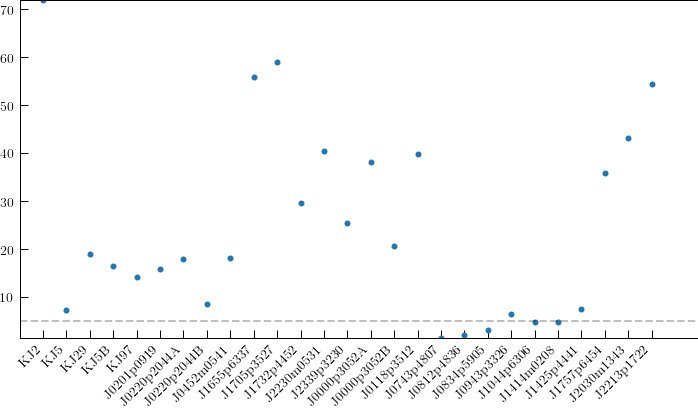

In [65]:
plt.subplots(figsize=(10, 6))
plt.plot(np.arange(27), everything_table[keck[OIII4363_cut]]['[OIII]4363']/everything_table[keck[OIII4363_cut]]['[OIII]4363 error'], 'o')
plt.axhline(5, ls='--', alpha=0.25)
plt.xticks(np.arange(27), everything_table[keck[OIII4363_cut]]['Target Name'], rotation=45, ha='right')
plt.xlim(-1, 28)
plt.show()

## HeI/HeI5876 ratio

In [72]:
HeI4026 = everything_table[keck[OIII4363_cut]]['HeI 5876']/everything_table[keck[OIII4363_cut]]['HeI 4026']
HeI4471 = everything_table[keck[OIII4363_cut]]['HeI 5876']/everything_table[keck[OIII4363_cut]]['HeI 4471']
HeI6678 = everything_table[keck[OIII4363_cut]]['HeI 5876']/everything_table[keck[OIII4363_cut]]['HeI 6678']
HeI7065 = everything_table[keck[OIII4363_cut]]['HeI 5876']/everything_table[keck[OIII4363_cut]]['HeI 7065']



/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/thsyu/.pyenv/versions/anaco

/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


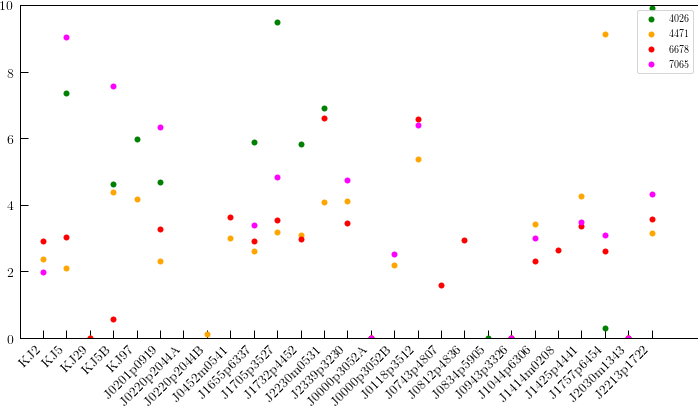

In [73]:
plt.subplots(figsize=(10, 6))
plt.plot(np.arange(27), HeI4026, 'o', color='green', label='4026')
plt.plot(np.arange(27), HeI4471, 'o', color='orange', label='4471')
plt.plot(np.arange(27), HeI6678, 'o', color='red', label='6678')
plt.plot(np.arange(27), HeI7065, 'o', color='magenta', label='7065')
plt.xticks(np.arange(27), everything_table[keck[OIII4363_cut]]['Target Name'], rotation=45, ha='right')
plt.xlim(-1, 28)
plt.ylim(0, 10)
plt.legend()
plt.show()

In [78]:
HeI4026[HeI4026 == 0.0] = np.nan
HeI4026[HeI4026 == np.inf] = np.nan
HeI4471[HeI4471 == 0.0] = np.nan
HeI4471[HeI4471 == np.inf] = np.nan
HeI6678[HeI6678 == 0.0] = np.nan
HeI6678[HeI6678 == np.inf] = np.nan
HeI7065[HeI7065 == 0.0] = np.nan
HeI7065[HeI7065 == np.inf] = np.nan

In [84]:
print (np.nanmin(HeI4026), np.nanmin(HeI4471), np.nanmin(HeI6678), np.nanmin(HeI7065))

0.297864529180474 0.11083974216089969 0.5645423438130326 1.9835471136853546


In [87]:
print (np.nanmin(everything_table[keck[OIII4363_cut]]['HeI 5876']/everything_table[keck[OIII4363_cut]]['HeI 5876 error']))
print (np.nanmedian(everything_table[keck[OIII4363_cut]]['HeI 5876']/everything_table[keck[OIII4363_cut]]['HeI 5876 error']))


4.167313810312715
17.587175291479127


/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/thsyu/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
